In [1]:
# 주어진 데이터셋으로 다양한 머신러닝을 적용해보자.

c:\Users\DILAB\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


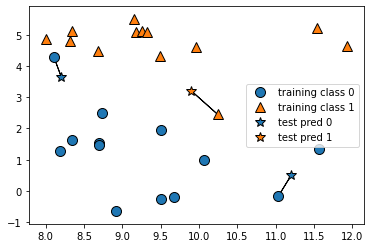

In [3]:
import mglearn
from matplotlib import pyplot as plt

mglearn.plots.plot_knn_classification(n_neighbors=1)
plt.show()

In [4]:
# dataset : make_forge
from sklearn.model_selection import train_test_split
X,y = mglearn.datasets.make_forge()
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, random_state=42)

c:\Users\DILAB\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function make_blobs is deprecated; Please import make_blobs directly from scikit-learn
  warnings.warn(msg, category=FutureWarning)


In [6]:
print(X_train,X_train.shape)
print(y_train, y_train.shape)

[[ 9.50169345  1.93824624]
 [ 9.32298256  5.09840649]
 [ 8.18378052  1.29564214]
 [10.06393839  0.99078055]
 [ 8.92229526 -0.63993225]
 [ 9.25694192  5.13284858]
 [ 9.50048972 -0.26430318]
 [ 8.69289001  1.54322016]
 [11.563957    1.3389402 ]
 [ 8.1062269   4.28695977]
 [11.0329545  -0.16816717]
 [ 9.17748385  5.09283177]
 [ 8.34810316  5.13415623]
 [ 9.49123469  4.33224792]
 [11.93027136  4.64866327]
 [ 7.99815287  4.8525051 ]
 [11.54155807  5.21116083]
 [ 8.67494727  4.47573059]
 [ 9.96346605  4.59676542]] (19, 2)
[0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1 1 1] (19,)


In [7]:
# KNN 알고리즘 사용
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3).fit(X_train,y_train)

In [9]:
clf.predict(X_test)

array([1, 0, 1, 0, 0, 0, 0])

In [10]:
clf.score(X_test,y_test)

0.8571428571428571

ModuleNotFoundError: No module named 'matplotlib._contour'

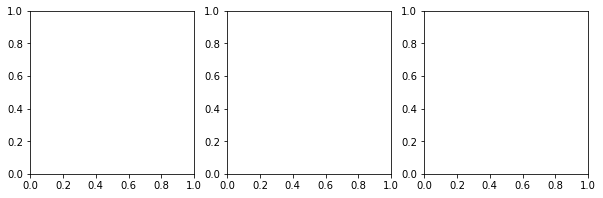

In [17]:
# 시각화

import matplotlib

fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbors, ax in zip([1, 3, 9], axes):
    # the fit method returns the object self, so we can instantiate and fit in one line
    clf = KNeighborsClassifier(n_neighbors=n_neighbors).fit(X, y)
    mglearn.plots.plot_2d_separator(clf, X, fill=True, eps=0.5, ax=ax, alpha=.4)
    mglearn.discrete_scatter(X[:, 0], X[:, 1], y, ax=ax)
    ax.set_title("{} neighbor(s)".format(n_neighbors))
    ax.set_xlabel("feature0")
    ax.set_ylabel("feature1")
axes[0].legend(loc=3)
plt.show()

In [6]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [8]:
cancer.data.shape, cancer.target.shape

((569, 30), (569,))

In [ ]:
# 열이 1개가 아닐때에는 선형모델을 사용하지 못한다.
# 그럼 어떤 모델을 사용해야할까? 여기서는 KNN(KNeighborsClassifier)을 사용했다.

